In [20]:
import ujson
import pandas as pd
from pprint import pprint
import numpy as np
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import OrderedDict
pd.set_option('display.max_colwidth', -1)


In [43]:
# from random import random

# items = []
# with open('./metadata.json', 'r') as f:
#     for item in f:
#         if random() > 0.5:
#             continue 
            
#         jstr = item.strip().replace("'s", " ")
#         jstr = item.strip().replace("'", "\"")
#         jstr = jstr.replace("\n", " ")
        
#         try:
#             jobj = ujson.loads(jstr)    
#         except:
#             continue
        
#         if not ('categories' in jobj and 'description' in jobj):
#             continue 
# #         print(jobj['categories'][0][0])
#         if jobj['categories'][0][0] != 'Cell Phones & Accessories':
#             continue 
            
#         if len(jobj['categories']) != 1:
#             continue 

#         if len(jobj['description'].split(" ")) < 10:
#             continue 
            
#         if len(jobj['categories'][0]) != 4:
#             continue 
# #         print(jobj)
        
# #         print(jobj['categories'])
#         items.append(jobj)
        
# print(len(items))

In [44]:


# stuff = []
# uniqs = set()
# for _, item in enumerate(items):
#     if len(item['categories']) > 1:
#         continue
    
# #     print(item['categories'][0][0])
#     uniqs.add(item['categories'][0][0])
#     for i, category in enumerate(item['categories']):
#         item['categories {}'.format(i)] = '.'.join(category)

#     stuff.append(item)
    
# pprint(list(uniqs))


In [42]:
# import numpy as np
# np.random.seed(1)

# sampled_items1 = np.random.choice(items, 50)
# # pprint(sampled_items)
# for item in sampled_items1:
#     print(item['asin'])
#     print(item['title'])
#     print(item['categories'], '\n')

In [188]:
# indices1 = ['B003XU6S8M', 'B007B5YUMQ'] # graphical cards
# indices1 += ['B004FLNBQA', 'B003R4R77K', 'B00744RR8S'] # Chargers & Adapters'

In [ ]:
# np.random.seed(1)

# sampled_items2 = np.random.choice(items, 30)
# # pprint(sampled_items)
# for item in sampled_items2:
#     print(item['asin'])
#     print(item['title'])
#     print(item['categories'], '\n')
    

In [54]:
# indices2 = ['B003WU2U4E', 'B00K899734'] # Car chargers
# indices2 += ['B006P4NOU8', 'B004836B6M', 'B000EWX75Y'] # Wired headsets

In [45]:
# index_set = set(indices1 + indices2)

# indices = []
# for i, item in enumerate(items):
#     if item['asin'] in index_set:
#         indices.append(i)

# print(len(indices))
# indices

In [2]:
from random import random

items = []
with open('./metadata.json', 'r') as f:
    for item in f:
#         if random() > 0.5:
#             continue 
            
        jstr = item.strip().replace("'s", " ")
        jstr = item.strip().replace("'", "\"")
        jstr = jstr.replace("\n", " ")
        
        try:
            jobj = ujson.loads(jstr)    
        except:
            continue
        
        if not ('categories' in jobj and 'description' in jobj):
            continue 
#         print(jobj['categories'][0][0])
        if jobj['categories'][0][0] not in set(['Clothing, Shoes & Jewelry']):
#         if jobj['categories'][0][0] not in set(['Cell Phones & Accessories', 
#                                                 'Electronics']):
            continue 
            
        if len(jobj['categories']) != 1:
            continue 

        if len(jobj['description'].split(" ")) < 10:
            continue 
            
        if len(jobj['categories'][0]) != 4:
            continue 
#         print(jobj)
        
#         print(jobj['categories'])
        items.append(jobj)
        
print(len(items))

7590


In [5]:
stuff = []
uniqs = set()
for _, item in enumerate(items):
    if len(item['categories']) > 1:
        continue
    
#     print(item['categories'][0][0])
#     for i, category in enumerate(item['categories']):
#         item['categories {}'.format(i)] = '.'.join(category)
    item['category'] = '.'.join(item['categories'][0])
    uniqs.add(item['category'] )
    
        
    stuff.append(item)

df = pd.DataFrame(stuff)

pprint(uniqs)

{'Clothing, Shoes & Jewelry.Baby.Baby Boys.Accessories',
 'Clothing, Shoes & Jewelry.Baby.Baby Boys.Clothing',
 'Clothing, Shoes & Jewelry.Baby.Baby Girls.Accessories',
 'Clothing, Shoes & Jewelry.Baby.Baby Girls.Clothing',
 'Clothing, Shoes & Jewelry.Boys.Accessories.Belts',
 'Clothing, Shoes & Jewelry.Boys.Accessories.Cold Weather',
 'Clothing, Shoes & Jewelry.Boys.Accessories.Hats & Caps',
 'Clothing, Shoes & Jewelry.Boys.Accessories.Neckties',
 'Clothing, Shoes & Jewelry.Boys.Accessories.Sunglasses',
 'Clothing, Shoes & Jewelry.Boys.Clothing.Active',
 'Clothing, Shoes & Jewelry.Boys.Clothing.Fashion Hoodies & Sweatshirts',
 'Clothing, Shoes & Jewelry.Boys.Clothing.Jackets & Coats',
 'Clothing, Shoes & Jewelry.Boys.Clothing.Socks',
 'Clothing, Shoes & Jewelry.Boys.Shoes.Boots',
 'Clothing, Shoes & Jewelry.Boys.Shoes.Clogs & Mules',
 'Clothing, Shoes & Jewelry.Boys.Shoes.Sandals',
 'Clothing, Shoes & Jewelry.Boys.Shoes.Slippers',
 'Clothing, Shoes & Jewelry.Boys.Watches.Watch Bands',

In [3]:
cats_2_get = [
    'Clothing, Shoes & Jewelry.Women.Shoes.Boots',
        'Clothing, Shoes & Jewelry.Women.Shoes.Fashion Sneakers',
    'Clothing, Shoes & Jewelry.Novelty, Costumes & More.Shoe Care & Accessories.Polishes & Dyes',
    'Clothing, Shoes & Jewelry.Novelty, Costumes & More.Jewelry Accessories.Cleaning & Care',
]

cats_2_get_set = set(cats_2_get)

In [6]:
np.random.seed(1)

dfs = []
for cat in cats_2_get:
    tmp_df = df[df['category']==cat].copy().sample(3)
    dfs.append(tmp_df)

sampled_df = pd.concat(dfs)

In [7]:

indices = []
for i, item in enumerate(stuff):
    if item['asin'] in set(sampled_df['asin'].tolist()):
        indices.append(i)

print(len(indices))
indices

12


[1038, 1064, 1492, 3128, 3792, 4131, 4283, 4517, 4658, 5319, 5711, 7216]

In [8]:
def stemmer(doc):
    stemmer = SnowballStemmer('english', ignore_stopwords=False)
    stop_words = set(stopwords.words('english')) 
    stop_words &= set(['afterward', 'afterwards'])
    return (stemmer.stem(w) for w in preprocessing(doc, stop_words))

def preprocessing(doc, stop_words):
    doc = word_tokenize(doc.lower())  # Split into words.
    return (w for w in doc if w not in stop_words and w.isalpha())

def get_tfidf(products):
    names = ['title', 'description']
    
    products['description'] = products['description'].fillna(' ')

    # Here is a more pandas-like style
    products['full_text'] = (products[['title', 'description']]
                             .apply(lambda x: '{} {}'
                             .format(x[0], x[1]), axis=1))
    doc = products['full_text'].tolist()
#     doc = products['description'].tolist()

    stop_words = set(stopwords.words('english')) 
    stop_words &= set(['afterward', 'afterwards', 'this', 'these', 'of', 'a',
                       'was', 'were', 'there', 'where', 'those', 'do', 'did',
                       'is', 'are', 'do', 'does', 'take', 'takes', 'the', 'it'])
#     stop_words &= set(pd.read_csv('./helpdata/stopwords.csv').iloc[:, 0]) 


    n_features = 10000

#     tfidf_vectorizer = TfidfVectorizer(analyzer=stemmer, 
#                                        max_df=.8, 
# #                                        min_df=1, 
#                                        max_features=n_features,
# #                                        sublinear_tf=True,
#                                        ngram_range=(1,4),
#                                        stop_words=stop_words)
    tfidf_vectorizer = TfidfVectorizer(
        preprocessor=lambda x: re.sub(r'(\d[\d\.])+', 'NUM', x.lower()),
        sublinear_tf=True,
#         max_df=0.95,
#         min_df=0.9,
#         stop_words=list(stop_words), 
#                                        ngram_range=(1,2)
    )
    tfidf = tfidf_vectorizer.fit_transform(doc)
#     tfidf_feature_names = tfidf_vectorizer.get_feature_names()

    return tfidf, tfidf_vectorizer
#     categories = products['categories'].apply(lambda x: x.strip('/'))     
#     target_names = categories.unique().tolist()
#     tgt_name_dict = OrderedDict([(tgt_name, i) 
#                                  for i, tgt_name in enumerate(target_names)])

#     target = categories.apply(lambda x: tgt_name_dict[x]) 


In [9]:
tfidf, tfidf_vectorizer = get_tfidf(df)

In [10]:
feats = tfidf_vectorizer.get_feature_names()
feats = np.array(feats)
len(feats)

20873

In [11]:
tfidf.shape

(7590, 20873)

In [67]:
# proc_vals = tfidf[indices, :]
# indices = [204, 43, 290, 1743, 2001, 3332, 4211, 5000, 6239, 7120]
# for ind in indices:
#     val = np.squeeze(np.asarray(tfidf[ind, :].todense()))
#     s_inds = np.argsort(-val).tolist()
    
#     print(items[ind]['title'])
#     print(items[ind]['categories'])
#     for i in range(50):
#         print(feats[s_inds[i]], ': \t\t\t', val[s_inds[i]])
    
#     print()


In [15]:
out_df = pd.DataFrame()

item_names = []
categories = []
top_terms = []
for ind in indices:
    val = np.squeeze(np.asarray(tfidf[ind, :].todense()))
    s_inds = np.argsort(-val).tolist()
    
    item_names.append(items[ind]['title'])
    categories.append(items[ind]['category'])
    tmp_str = ''
    for i in range(10):
        tmp_str += '{} ({}), '.format(feats[s_inds[i]], round(val[s_inds[i]], 4))
    top_terms.append(tmp_str)

out_df['item'] = item_names
out_df['category'] = categories
out_df['terms'] = top_terms
print(out_df)

                                                                                                   item  \
0   Xelement Womens Dark Brown Crushed Super Harness Boots - 7                                            
1   Meltonian Shoe Cream Polish, Med Brown [Apparel] [Misc.]                                              
2   Mizuno Wave Ascend 4 Womens SZ 9.5 Silver Running 40.5 EU 7 UK Shoes                                  
3   Kiwi Sport Whitener                                                                                   
4   Coach Barrett Poppy Scribble Multi Shoes Sneakers 8                                                   
5   Biker Boot Straps Boot Straps - 6in. - Studded Peace BBS/SP6                                          
6   Aircraft Tool Supply Ultrasonic Solution (Jewelry)                                                    
7   TRG the One Self Shine Leather Dye Kit #165 Turquoise                                                 
8   Anti-Tarnish Silver Cloth - Cadet

In [285]:
out_df.to_latex('amzon_table.tex', index=False)

In [16]:
tfidf[indices, :]

<12x20873 sparse matrix of type '<class 'numpy.float64'>'
	with 651 stored elements in Compressed Sparse Row format>

In [17]:
indices

[1038, 1064, 1492, 3128, 3792, 4131, 4283, 4517, 4658, 5319, 5711, 7216]

In [19]:
scipy.sparse.save_npz('amazon_hqs.npz', tfidf[indices, :])

In [49]:

out_df.to_csv('amazon_items.csv', sep='\t')

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns


In [75]:
cos_mat = cosine_similarity(tfidf[indices, :])
cos_mat 

array([[1.        , 0.040234  , 0.07306416, 0.0096784 , 0.0549833 ,
        0.06410185, 0.02575936, 0.05100819, 0.0329296 , 0.05699416,
        0.00654179, 0.05588291],
       [0.040234  , 1.        , 0.02141424, 0.0849532 , 0.03344453,
        0.02838375, 0.02052255, 0.0459972 , 0.11526014, 0.03060874,
        0.01376874, 0.03039898],
       [0.07306416, 0.02141424, 1.        , 0.00182512, 0.07239409,
        0.02642157, 0.00641389, 0.02680092, 0.04272571, 0.06337989,
        0.01661858, 0.00532452],
       [0.0096784 , 0.0849532 , 0.00182512, 1.        , 0.00335639,
        0.00238598, 0.00813856, 0.0141038 , 0.01875337, 0.00285661,
        0.00265823, 0.00274235],
       [0.0549833 , 0.03344453, 0.07239409, 0.00335639, 1.        ,
        0.02517577, 0.00528407, 0.04044919, 0.02983306, 0.01543032,
        0.00980672, 0.04027933],
       [0.06410185, 0.02838375, 0.02642157, 0.00238598, 0.02517577,
        1.        , 0.03116507, 0.0621242 , 0.06456963, 0.02649651,
        0.01671711,

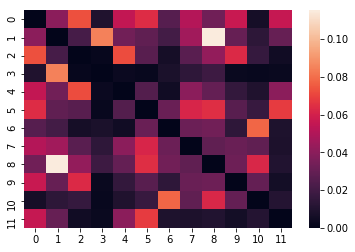

In [78]:
sns.heatmap(cos_mat - np.eye(12))